In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L0FwcGxpY2F0aW9ucy9TTVUvR3JlYXQgRWFzdGVybi9QZXJzb25hbCBQcm9qZWN0L1JGTSBQcm9qZWN0'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

{"/Users/apple/Library/Caches/org.R-project.R/R/reticulate/uv/python/cpython-3.11.13-macos-aarch64-none/lib/python3.11/importlib/_bootstrap.py": 1751800287.2409413, "/Users/apple/Library/Caches/org.R-project.R/R/reticulate/uv/python/cpython-3.11.13-macos-aarch64-none/lib/python3.11/importlib/_bootstrap_external.py": 1751800287.24125, "/Users/apple/Library/Caches/org.R-project.R/R/reticulate/uv/python/cpython-3.11.13-macos-aarch64-none/lib/python3.11/zipimport.py": 1751800287.4436939, "/Users/apple/Library/Caches/org.R-project.R/R/reticulate/uv/python/cpython-3.11.13-macos-aarch64-none/lib/python3.11/codecs.py": 1751800287.0701318, "/Users/apple/Library/Caches/org.R-project.R/R/reticulate/uv/python/cpython-3.11.13-macos-aarch64-none/lib/python3.11/encodings/aliases.py": 1751800287.0915155, "/Users/apple/Library/Caches/org.R-project.R/R/reticulate/uv/python/cpython-3.11.13-macos-aarch64-none/lib/python3.11/encodings/__init__.py": 1751800287.0907564, "/Users/apple/Library/Caches/org.R-pro

In [2]:
import requests
import json
import time
import pandas as pd
from datetime import datetime
import os
import openpyxl

# 用户配置区域
SERPAPI_KEY = "84c798a8d45d1e7cae0b18df778ac06bf2c6169f0249e40756aea0b9d6cd4749"  
RESULTS_PER_KEYWORD = 20
DELAY_BETWEEN_REQUESTS = 1
DELAY_BETWEEN_KEYWORDS = 2

In [3]:
keywords = [
    "中国高净值人士 新加坡",
    "中国富人 资产配置 新加坡", 
    "中国富豪 为什么移民新加坡",
    "中国高净值客户 离岸账户",
    "新加坡 CRS 避税",
    "中国 家族信托 新加坡",
    "中国高净值人士 子女教育 新加坡",
    "中国移民新加坡 财富管理"
]

In [4]:
def serpapi_search(query, api_key, num=20, start=0):
    url = "https://serpapi.com/search"
    params = {
        'q': query,
        'api_key': api_key,
        'engine': 'google',
        'num': min(num, 100),
        'start': start,
        'hl': 'zh-cn',
        'gl': 'cn'
    }
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"搜索请求失败: {e}")
        return {}

def extract_search_results(results, keyword):
    extracted_results = []
    organic_results = results.get('organic_results', [])
    for item in organic_results:
        result_info = {
            'keyword': keyword,
            'title': item.get('title', ''),
            'url': item.get('link', ''),
            'snippet': item.get('snippet', ''),
            'displayed_link': item.get('displayed_link', ''),
            'position': item.get('position', 0),
            'search_timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        }
        extracted_results.append(result_info)
    return extracted_results

In [5]:
def search_keyword_with_pagination(keyword, api_key, total_results=20):
    all_results = []
    results_per_page = 10
    for start in range(0, total_results, results_per_page):
        remaining = total_results - start
        num_to_get = min(results_per_page, remaining)
        print(f"    获取第 {start+1}-{start+num_to_get} 条结果...")
        results = serpapi_search(keyword, api_key, num=num_to_get, start=start)
        if not results or 'organic_results' not in results:
            print(f"没有更多结果")
            break
        extracted = extract_search_results(results, keyword)
        all_results.extend(extracted)
        if len(extracted) < num_to_get:
            break
        time.sleep(DELAY_BETWEEN_REQUESTS)
    return all_results

In [6]:
#| eval: false
def main():
    print("开始搜索...")
    print(f"搜索关键词数量: {len(keywords)}")
    print(f"每个关键词获取结果数: {RESULTS_PER_KEYWORD}")
    print("-" * 50)
    
    all_search_results = []
    for i, keyword in enumerate(keywords, 1):
        print(f"[{i}/{len(keywords)}] 搜索关键词: {keyword}")
        try:
            results = search_keyword_with_pagination(keyword, SERPAPI_KEY, RESULTS_PER_KEYWORD)
            all_search_results.extend(results)
            print(f"找到 {len(results)} 个结果")
            if i < len(keywords):
                print(f"等待 {DELAY_BETWEEN_KEYWORDS} 秒...")
                time.sleep(DELAY_BETWEEN_KEYWORDS)
        except Exception as e:
            print(f"错误: {e}")
            continue
    print("-" * 50)
    print(f"总共找到 {len(all_search_results)} 个结果")
    return all_search_results

search_results = main()

In [7]:
#| eval: false
if search_results:
    df_full = pd.DataFrame(search_results)
    df_unique = df_full.drop_duplicates(subset=['url'], keep='first')
    print(f"原始结果: {len(df_full)}，去重后: {len(df_unique)}")

    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    df_simple = df_unique[['keyword', 'title', 'url', 'search_timestamp']].copy()

    # 保存到指定 Dataset
    save_dir = os.path.expanduser("/Applications/SMU/Great Eastern/Personal Project/RFM Project/Dataset")
    os.makedirs(save_dir, exist_ok=True)

    df_unique.to_csv(os.path.join(save_dir, f"search_results_full_{timestamp}.csv"), index=False, encoding='utf-8-sig')
    df_simple.to_csv(os.path.join(save_dir, f"search_results_simple_{timestamp}.csv"), index=False, encoding='utf-8-sig')

    with pd.ExcelWriter(os.path.join(save_dir, f"search_results_{timestamp}.xlsx"), engine='openpyxl') as writer:
        df_unique.to_excel(writer, sheet_name='完整数据', index=False)
        df_simple.to_excel(writer, sheet_name='简化数据', index=False)

    print(f"文件保存路径: {save_dir}")

    print("\n数据预览:")
    print(df_simple.head())

    print("\n每个关键词的结果数量:")
    print(df_unique['keyword'].value_counts())

    globals()['search_data'] = df_unique
    globals()['search_data_simple'] = df_simple

    print("\n变量已加载: search_data, search_data_simple")
else:
    print("没有搜索结果")
    globals()['search_data'] = pd.DataFrame()
    globals()['search_data_simple'] = pd.DataFrame()

In [8]:
#| eval: false
from bs4 import BeautifulSoup
import chardet

# 文件路径设置
input_file = "/Applications/SMU/Great Eastern/Personal Project/RFM Project/Dataset/search_results_20250706_192824.xlsx"
output_file = "/Applications/SMU/Great Eastern/Personal Project/RFM Project/Dataset/search_results_with_content.xlsx"

# 读取简化数据工作表
df = pd.read_excel(input_file, sheet_name="简化数据")

# 正文提取函数
def fetch_article_content(url, timeout=10):
    try:
        response = requests.get(url, timeout=timeout, headers={"User-Agent": "Mozilla/5.0"})
        detected = chardet.detect(response.content)
        response.encoding = detected['encoding'] or 'utf-8'
        soup = BeautifulSoup(response.text, "html.parser")
        paragraphs = soup.find_all('p')
        content = '\n'.join(p.get_text(strip=True) for p in paragraphs)
        return content if len(content) > 50 else None
    except Exception:
        return None

# 爬取内容
print("开始抓取正文内容...")
df["content"] = df["url"].apply(fetch_article_content)
print("正文抓取完成，开始保存文件...")

# 保存为新的 Excel 文件
df.to_excel(output_file, index=False)
print(f"文件已保存至：{output_file}")

In [9]:
# 输入输出路径
input_file = "/Applications/SMU/Great Eastern/Personal Project/RFM Project/Dataset/search_results_with_content.xlsx"
output_file = "/Applications/SMU/Great Eastern/Personal Project/RFM Project/Dataset/search_results_cleaned.xlsx"

# 加载 Excel 文件
df = pd.read_excel(input_file)

# 定义无效内容关键词
ad_keywords = [
    "免责声明", "广告合作", "联系管理员", "请在微信中打开", "本站所有文章",
    "抱歉", "页面不存在", "出错", "404", "请输入验证码",
    "登录查看全文", "Oops", "Something went wrong", "访问受限"
]

# 判断是否为无效正文
def is_invalid(text):
    if pd.isna(text):
        return True
    if len(text.strip()) < 100:
        return True
    if any(kw in text for kw in ad_keywords):
        return True
    return False

# 添加标记列
df["invalid"] = df["content"].apply(is_invalid)

# 保留有效正文内容
df_cleaned = df[~df["invalid"]].drop(columns=["invalid"]).copy()

# 保存清洗后的结果
df_cleaned.to_excel(output_file, index=False)
print(f"清洗完成，已保存为：{output_file}")

清洗完成，已保存为：/Applications/SMU/Great Eastern/Personal Project/RFM Project/Dataset/search_results_cleaned.xlsx


In [10]:
# 读取 Excel 文件
df = pd.read_excel("search_results_cleaned.xlsx")

# 1. 查看行数和列数
print("行数 × 列数:", df.shape)

# 2. 查看列名和类型
print("\n列名与数据类型:")
print(df.dtypes)

# 3. 快速概览每列的前几行（结构 + 值）
print("\n样本预览:")
print(df.head())

# 4. 缺失值统计（NA 值）
print("\n⚠缺失值统计:")
print(df.isna().sum())

行数 × 列数: (90, 6)

列名与数据类型:
keyword             object
title               object
url                 object
search_timestamp    object
content             object
invalid               bool
dtype: object

样本预览:
       keyword                           title  \
0  中国高净值人士 新加坡          新加坡金融机制稳定吸引最多高净值人士考虑移居   
1  中国高净值人士 新加坡          我国超高净值人群设立家族办公室现状分析与应对   
2  中国高净值人士 新加坡  中国高净值人士在新加坡设立家族办公室和投资初创企业的 ...   
3  中国高净值人士 新加坡        高净值人士为何纷纷选择新加坡？_移民_教育_工作   
4  中国高净值人士 新加坡    聚焦家办| 亚洲超高净值人群增长或将推动家族办公室的发展   

                                                 url     search_timestamp  \
0  https://www.zaobao.com/finance/singapore/story...  2025-07-06 19:19:49   
1  http://cel.cn/List/FullText?articleId=d37c148c...  2025-07-06 19:19:49   
2  https://fargowealth.com/en/home/cfsj/cfsj_deta...  2025-07-06 19:19:49   
3         https://www.sohu.com/a/843292362_121963266  2025-07-06 19:19:49   
4  https://www.bloombergchina.com/blog/asias-ultr...  2025-07-06 19:19:49   

                          

In [11]:
df_cleaned = df[~df["invalid"] & df["content"].notna()].copy()
df_cleaned.to_excel("search_results_cleaned.xlsx", index=False)

In [12]:
import re
from collections import Counter
import jieba

# 1. 加载清洗后的文章数据
df = pd.read_excel("Dataset/search_results_cleaned.xlsx")
df = df[df["content"].notna() & (df["content"].str.strip() != "")]

# 2. 读取停用词表
with open("Dataset/cn_stopwords.txt", "r", encoding="utf-8") as f:
    stopwords = set([line.strip() for line in f])

# 3. 清洗函数
def clean_text(s):
    s = re.sub(r'<.*?>', '', s)  # HTML标签
    s = re.sub(r'[a-zA-Z]+', '', s)  # 英文
    s = re.sub(r'[\d\-:/\.年月日\s]+', '', s)  # 数字与日期
    s = re.sub(r'[\u0000-\u007F]+', '', s)  # ASCII符号
    return s.strip()

# 4. 分句 + 清洗 + 分词 + 去停用词
words = []
for content in df["content"]:
    sentences = re.split(r'[。！？]', content)
    for s in sentences:
        s_clean = clean_text(s)
        if len(s_clean) >= 5:
            segs = jieba.cut(s_clean)
            words += [w for w in segs if len(w) > 1 and w not in stopwords and re.match(r'[\u4e00-\u9fff]+', w)]

# 5. 词频统计
word_freq = Counter(words)
df_freq = pd.DataFrame(word_freq.most_common(100), columns=["Word", "Frequency"])

# 6. 保存到文件
df_freq.to_excel("Dataset/word_frequency_cleaned_with_stopwords.xlsx", index=False)

# 7. 打印结果
print(df_freq)

/Users/apple/Library/Caches/org.R-project.R/R/reticulate/uv/cache/archive-v0/o0HeyIAikL2nAmp5xy_lw/lib/python3.11/site-packages/jieba/_compat.py:18: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Building prefix dict from the default dictionary ...


Loading model from cache /var/folders/k6/m28nhmy16gq06mch2hprzgfw0000gn/T/jieba.cache


Loading model cost 0.282 seconds.


Prefix dict has been built successfully.


   Word  Frequency
0   新加坡       1895
1    信托       1301
2    家族       1028
3    资产        947
4    投资        922
..  ...        ...
95   方式        133
96   目前        132
97   顾问        132
98   数量        128
99   产品        126

[100 rows x 2 columns]


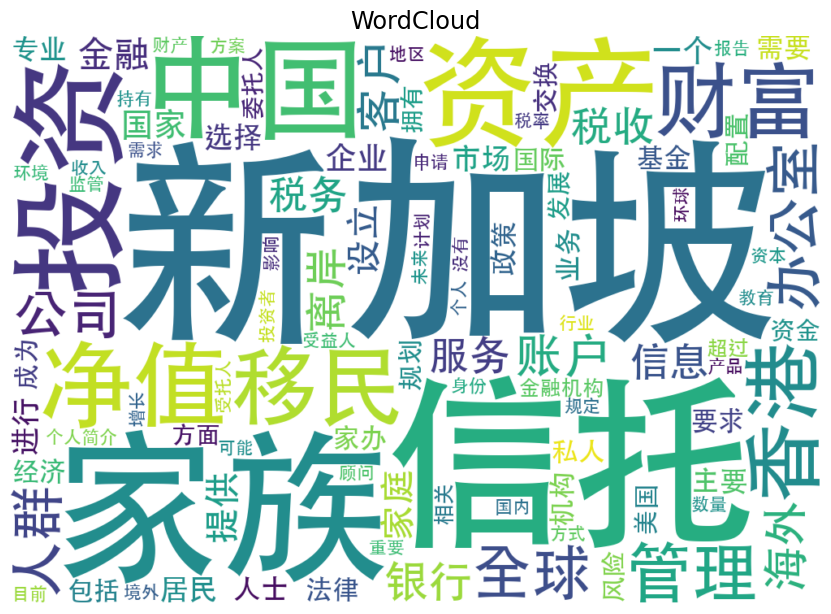

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. 加载词频数据
df_freq = pd.read_excel("Dataset/word_frequency_cleaned_with_stopwords.xlsx")

# 2. 转换为字典格式
freq_dict = dict(zip(df_freq["Word"], df_freq["Frequency"]))

# 3. 创建词云对象
wc = WordCloud(
    font_path="/System/Library/Fonts/STHeiti Medium.ttc",  # 替换为你本地支持中文的字体路径
    background_color="white",
    width=1000,
    height=700,
    max_words=200
).generate_from_frequencies(freq_dict)

# 4. 可视化词云
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud", fontsize=18)
plt.subplots_adjust(top=0.85) 
plt.show()

In [14]:
from snownlp import SnowNLP

# 读取已清洗的数据
df = pd.read_excel("Dataset/search_results_cleaned.xlsx")

# 过滤掉无正文
df = df[df["content"].notna() & (df["content"].str.len() > 30)].copy()

# 情感分析函数（返回值在 0～1 之间，1 越积极）
def get_sentiment(text):
    try:
        return SnowNLP(text).sentiments
    except:
        return None

# 添加情感评分列
df["sentiment_score"] = df["content"].apply(get_sentiment)

# 分类标签：大于 0.6 为正面，小于 0.4 为负面，其余为中性
def classify(score):
    if score is None:
        return "Unknown"
    elif score > 0.6:
        return "Positive"
    elif score < 0.4:
        return "Negative"
    else:
        return "Neutral"

df["sentiment_label"] = df["sentiment_score"].apply(classify)

# 保存结果
df.to_excel("Dataset/search_results_sentiment.xlsx", index=False)

# 查看统计
print(df["sentiment_label"].value_counts())

sentiment_label
Positive    85
Negative     5
Name: count, dtype: int64


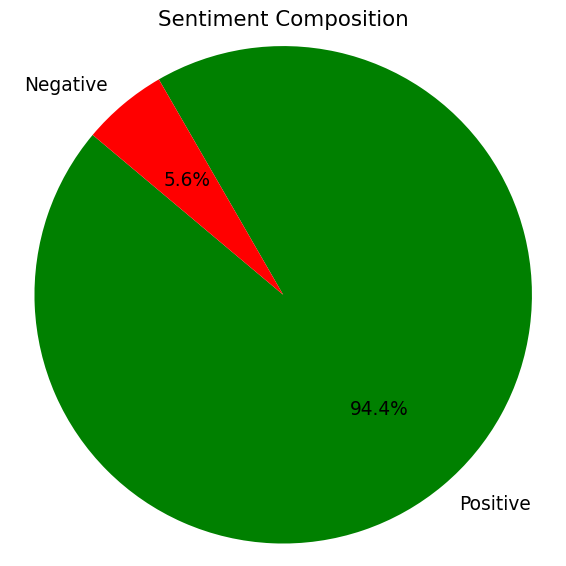

In [15]:
import matplotlib.pyplot as plt

# Count sentiment
sentiment_counts = df["sentiment_label"].value_counts()

# 设置颜色和标签顺序
labels = sentiment_counts.index.tolist()
colors = ['green' if label == 'Positive' else 'red' for label in labels]

# 绘图
plt.figure(figsize=(6,6))
plt.pie(
    sentiment_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 14}
)
plt.title("Sentiment Composition", fontsize=16)
plt.tight_layout()
plt.axis('equal')  
plt.show()

sentiment_label   Negative  Positive
keyword                             
中国 家族信托 新加坡              0        14
中国富人 资产配置 新加坡            1         8
中国富豪 为什么移民新加坡            1         5
中国移民新加坡 财富管理             0        11
中国高净值人士 子女教育 新加坡         0         9
中国高净值人士 新加坡              2        12
中国高净值客户 离岸账户             0        15
新加坡 CRS 避税               1        11


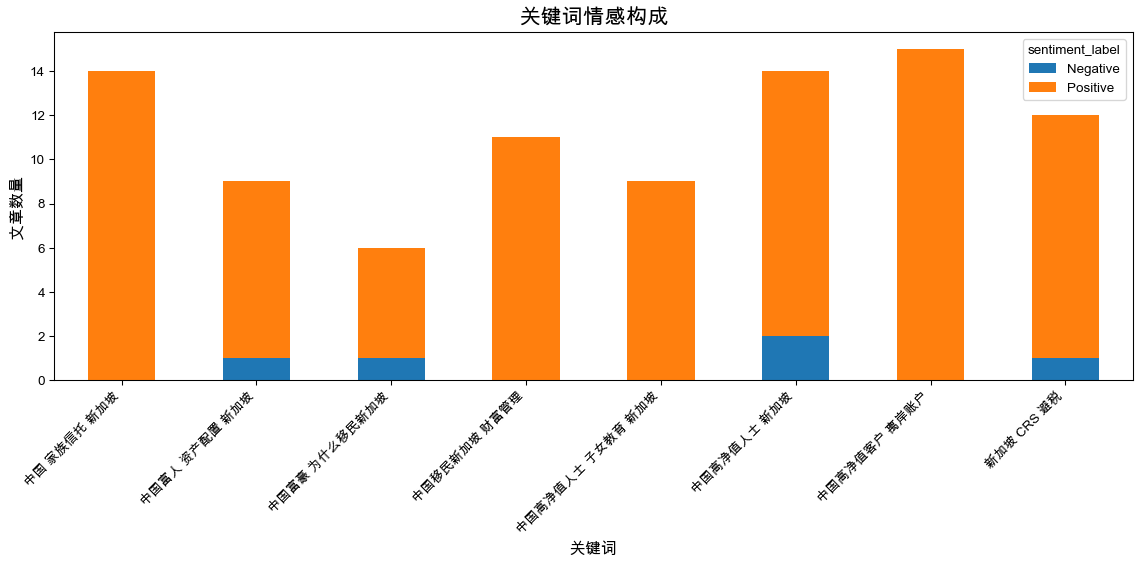

In [16]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Arial Unicode MS'  # 更通用的中英混排字体
plt.rcParams['axes.unicode_minus'] = False

# 分组：统计每个 keyword 下的正负面数量
sentiment_by_keyword = df.groupby(['keyword', 'sentiment_label']).size().unstack(fill_value=0)

# 打印检查
print(sentiment_by_keyword)

# 绘图：堆叠柱状图
sentiment_by_keyword.plot(kind='bar', stacked=True, figsize=(12, 6), color=["#1f77b4", "#ff7f0e"])  

# 设置标题和轴标签
plt.title("关键词情感构成", fontsize=16)
plt.xlabel("关键词", fontsize=12)
plt.ylabel("文章数量", fontsize=12)

# 旋转 x 轴文字防止重叠
plt.xticks(rotation=45, ha='right')

# 自动布局
plt.tight_layout()

# 显示图像
plt.show()

In [17]:
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt

# 用于存储每句话的关键词
keyword_sentences = []

for content in df["content"]:
    sentences = re.split(r'[。！？]', content)
    for s in sentences:
        s_clean = clean_text(s)
        if len(s_clean) >= 5:
            segs = jieba.cut(s_clean)
            word_list = [w for w in segs if len(w) > 1 and w not in stopwords and re.match(r'[\u4e00-\u9fff]+', w)]
            keyword_sentences.append(word_list)

In [18]:
top_100_words = set(df_freq["Word"])
co_occurrence = Counter()

# 只统计 top100 词之间的共现
for word_list in keyword_sentences:
    words_in_top100 = [w for w in word_list if w in top_100_words]
    for pair in combinations(set(words_in_top100), 2):  # set 去重
        co_occurrence[tuple(sorted(pair))] += 1

In [19]:
import matplotlib.font_manager as fm
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'PingFang' in font or 'Arial' in font or 'Hei' in font:
        print(font)

/System/Library/Fonts/Supplemental/Arial Bold.ttf
/System/Library/Fonts/PingFang.ttc
/System/Library/Fonts/STHeiti Medium.ttc
/System/Library/Fonts/Supplemental/Arial Black.ttf
/System/Library/Fonts/Supplemental/Arial Narrow.ttf
/System/Library/Fonts/Supplemental/Arial.ttf
/System/Library/Fonts/ArialHB.ttc
/System/Library/Fonts/Supplemental/Arial Rounded Bold.ttf
/System/Library/Fonts/Supplemental/Arial Narrow Bold Italic.ttf
/System/Library/Fonts/Supplemental/Arial Narrow Bold.ttf
/System/Library/Fonts/STHeiti Light.ttc
/System/Library/Fonts/Supplemental/Arial Italic.ttf
/System/Library/Fonts/Supplemental/Arial Bold Italic.ttf
/System/Library/Fonts/Supplemental/Arial Narrow Italic.ttf
/System/Library/Fonts/Supplemental/Arial Unicode.ttf
/Library/Fonts/Arial Unicode.ttf


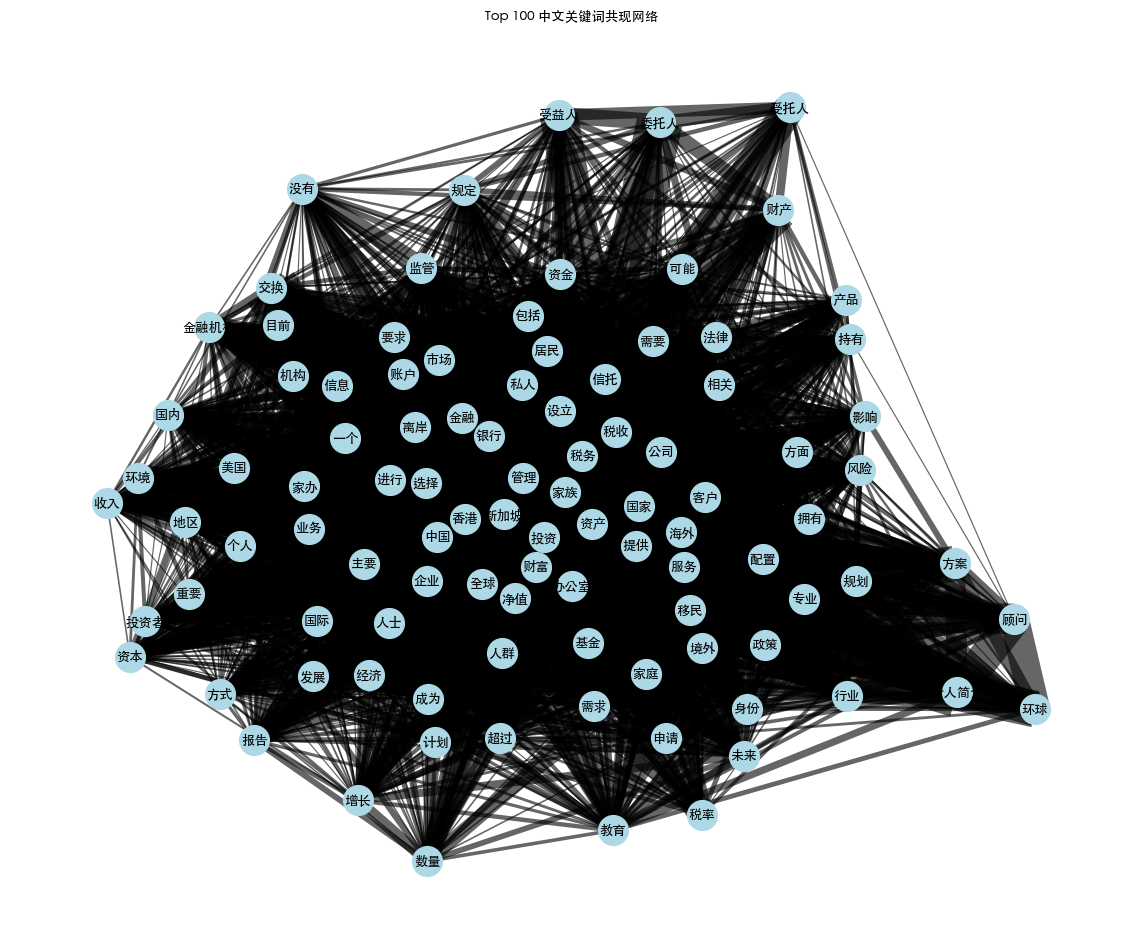

In [20]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import networkx as nx

# 手动设置中文字体（可替换为你机器已有的其他中文字体路径）
my_font = fm.FontProperties(fname="/System/Library/Fonts/STHeiti Medium.ttc")
plt.rcParams['font.family'] = my_font.get_name()
plt.rcParams['axes.unicode_minus'] = False

# 构建图（你需要已经准备好 co_occurrence 字典）
G = nx.Graph()
for (w1, w2), freq in co_occurrence.items():
    if freq >= 3:  # 设定共现阈值
        G.add_edge(w1, w2, weight=freq)

# 可视化绘图
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5, seed=42)  # 节点布局
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=[d['weight'] * 0.3 for _, _, d in G.edges(data=True)], alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10, font_family=my_font.get_name())

plt.title("Top 100 中文关键词共现网络", fontproperties=my_font)
plt.axis("off")
plt.tight_layout()
plt.show()

In [21]:
# 计算节点的度中心性
degree_centrality = nx.degree_centrality(G)

# 按中心性排序，取前10个关键词
top_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# 打印结果
print("Top 10 关键词:")
for word, score in top_nodes:
    print(f"{word}: {score:.3f}")

Top 10 关键词:
新加坡: 1.000
资产: 1.000
投资: 1.000
公司: 1.000
管理: 0.980
净值: 0.970
中国: 0.970
香港: 0.970
进行: 0.970
银行: 0.960


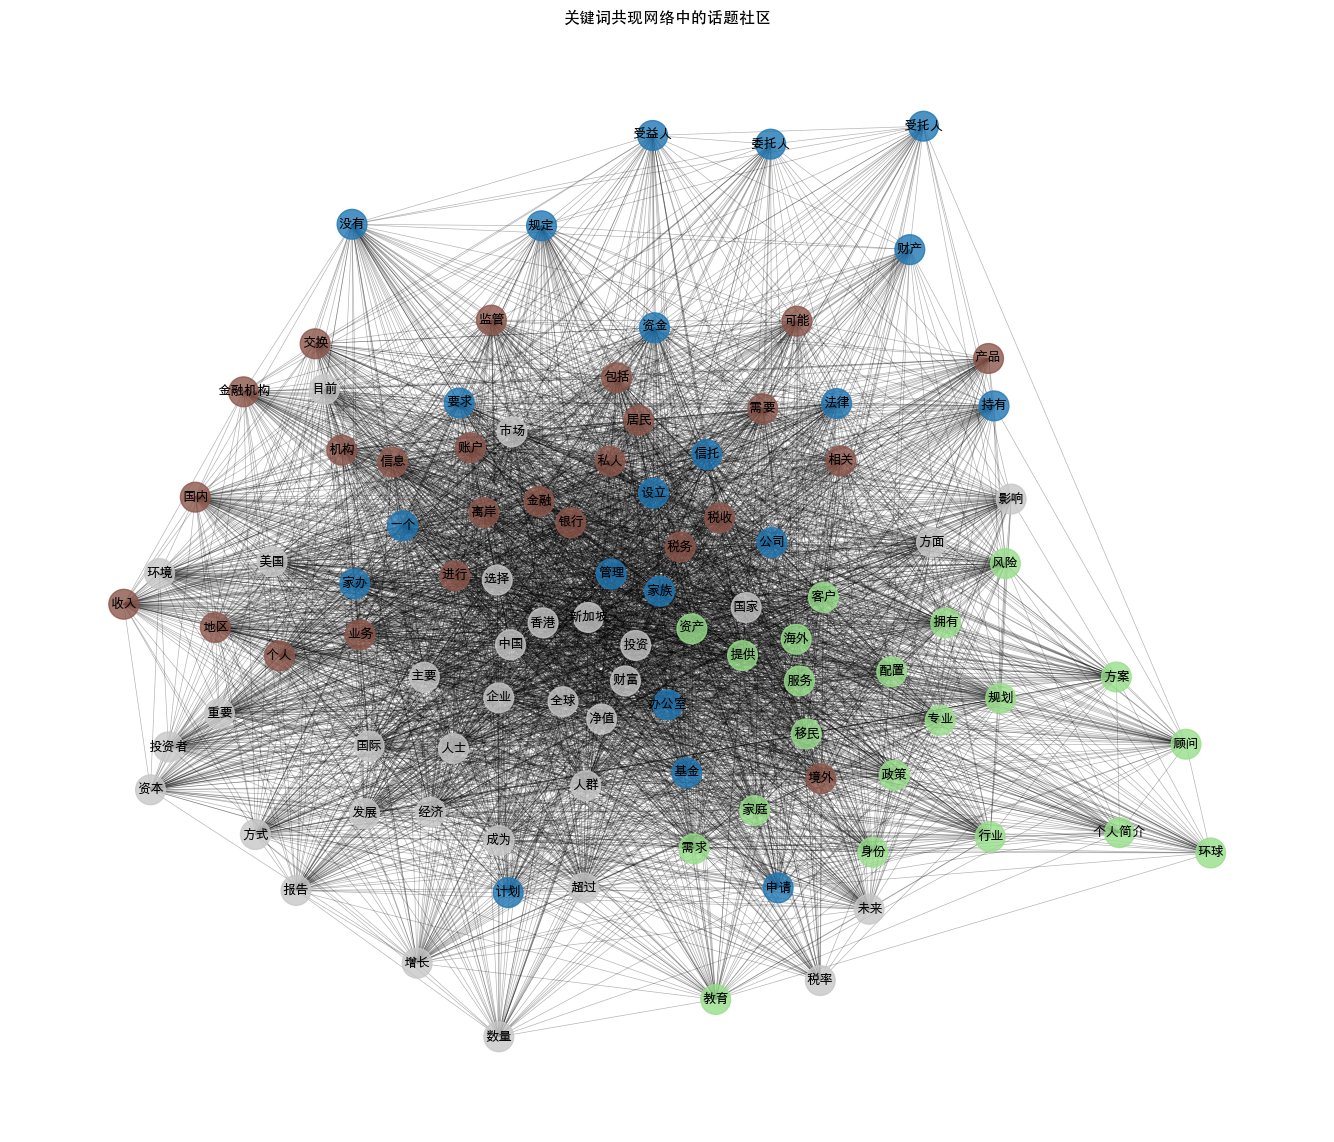

In [22]:
import community as community_louvain  # pip install python-louvain
import matplotlib.cm as cm

# 社区划分
partition = community_louvain.best_partition(G)

# 设置颜色映射
size = float(len(set(partition.values())))
pos = nx.spring_layout(G, k=0.5, seed=42)
colors = [cm.tab20(i / size) for i in partition.values()]

# 绘图
plt.figure(figsize=(14, 12))
nx.draw_networkx_nodes(G, pos, node_size=500, node_color=colors, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='Arial Unicode MS')
plt.title("关键词共现网络中的话题社区")
plt.axis("off")
plt.tight_layout()
plt.show()